In [39]:
import torch
import torch.nn as nn
from torch_snippets import *
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("D:\Jupyter Lab\MathModel")
print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\Jupyter Lab\MathModel

formulas.norm.list -> contine formulele 135060
test.lst 
train.lst    Toate au formatul  [image.png] - formula number 
valid.lst

deci :
toate formulele -> array de string-uri ( numpy / python lists ) o sa fac teste :
 

In [2]:
formulas_list = []
with open("latex_data/latex_data/formulas.norm.lst","r") as f:
    for line in f:
        formulas_list.append(line.strip())
        
len(formulas_list), formulas_list[132]

(103559,
 '{ \\frac { \\partial \\bar { g } _ { \\mu \\nu } } { \\partial l _ { i } } } \\in \\mathrm { K e r } ( \\bar { F } ^ { \\dagger } )')

In [3]:
# List the dir

images = os.listdir("latex_data/latex_data/images_processed")
len(images),images[1]

(103536, '10007a9101.png')

deci am fiecare imagine intr o lista , fiecare ecuatie intr o lista. 
Deschid fisierul , citesc linia , dau split

In [4]:
valid_path = "latex_data/latex_data/valid.lst"
train_path = "latex_data/latex_data/train.lst"
test_path = "latex_data/latex_data/test.lst"


def get_dict(path):
    dict = {
    "image" : [],
    "id_formula" : [],
    }
    
    with open(path,"r") as f:
        for line in f:
            s = line.split()
            dict["image"].append(s[0])
            dict["id_formula"].append(s[1])
            
    return dict
    
train_dict = get_dict(train_path)

In [5]:
print(train_dict["image"][1])
print()
print(train_dict["id_formula"][1])
print()
print(formulas_list[int(train_dict["id_formula"][1])-1])

66667cee5b.png

2

d s ^ { 2 } = ( 1 - { \frac { q c o s \theta } { r } } ) ^ { \frac { 2 } { 1 + \alpha ^ { 2 } } } \lbrace d r ^ { 2 } + r ^ { 2 } d \theta ^ { 2 } + r ^ { 2 } s i n ^ { 2 } \theta d \varphi ^ { 2 } \rbrace - { \frac { d t ^ { 2 } } { ( 1 - { \frac { q c o s \theta } { r } } ) ^ { \frac { 2 } { 1 + \alpha ^ { 2 } } } } } \, .


In [6]:
from PIL import Image

def show_image(path_2_images,image_id):
    full_path = os.path.join(path_2_images,image_id)
    image = Image.open(full_path)
    image = np.array(image)
    #plt.imshow(image)
    #plt.show()
    print(image.shape)

path_2_images = "latex_data/latex_data/images_processed"
len_train_image = len(train_dict["image"])
random_idx = np.random.randint(1,len_train_image)

show_image(path_2_images,train_dict["image"][random_idx])

(40, 200, 3)


In [7]:
train_dict

{'image': ['60ee748793.png',
  '66667cee5b.png',
  '1cbb05a562.png',
  'ed164cc822.png',
  'e265f9dc6b.png',
  '242a58bc3a.png',
  'a4d25113b2.png',
  '72f6bc494a.png',
  '3cf9d0b234.png',
  '5be376c443.png',
  '4dd5a0e4ad.png',
  '6e7448ca84.png',
  '5adf6fe332.png',
  '4e9e19a3cf.png',
  '3a950d09c0.png',
  '5d1a1ed037.png',
  '698111df57.png',
  '73fdf824d0.png',
  '35a6b52146.png',
  '6fefdec123.png',
  '2a7a69318b.png',
  '2ce5749395.png',
  '9016b4fca0.png',
  '2cb87ed9c8.png',
  '4765b43e98.png',
  '33978e1330.png',
  '3945cf2343.png',
  '4c6c104eb5.png',
  '5d58861c3f.png',
  '2ae8eccc13.png',
  '56f7827473.png',
  '6176f74d0f.png',
  '662ccce98f.png',
  '2440895f67.png',
  '45b9b7323d.png',
  '672a31c2cc.png',
  '10c37c445e.png',
  '427968501c.png',
  '65d334ea47.png',
  '7ab1fc083e.png',
  '5dab1ec4de.png',
  '7d0867620d.png',
  '67fcffa9a3.png',
  '4b069edf09.png',
  '2b8e14887f.png',
  '1ba2cffb3c.png',
  '7dfe32d42b.png',
  '11421b7af6.png',
  '22a003507e.png',
  '17226e3e

In [33]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

class MathFormulaDataset(Dataset):
        
    def __init__(self, image_path, formulas_list_path, train_path, transform=None):
        self.image_path = image_path
        self.formulas_list = self.load_formulas(formulas_list_path)
        self.data = self.load_data(train_path)
        self.transform = transform
    
    def load_formulas(self, formulas_list_path):
        formulas_list = []
        with open(formulas_list_path, "r") as f:
            for line in f:
                formulas_list.append(line.strip())
        return formulas_list
    
    def load_data(self, train_path):
        data = {"image": [], "id_formula": []}
        with open(train_path, "r") as f:
            for line in f:
                s = line.split()
                data["image"].append(s[0])
                data["id_formula"].append(int(s[1]) - 1) 
        return data
    
    def __len__(self):
        return len(self.data["image"])
    
    def __getitem__(self, idx):
        image_name = self.data["image"][idx]
        image = Image.open(os.path.join(self.image_path, image_name))
        formula_id = self.data["id_formula"][idx]
        formula = self.formulas_list[formula_id]
        
        if self.transform:
            image = self.transform(image)
        
        return image, formula

image_path = "latex_data/latex_data/images_processed"
formulas_list_path = "latex_data/latex_data/formulas.norm.lst"
train_path = "latex_data/latex_data/train.lst"

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

dataset = MathFormulaDataset(image_path, formulas_list_path, train_path,transform)
data_dl = DataLoader(dataset,batch_size=64,shuffle=True)

sample_image, sample_formula = dataset[0]
#print("Sample formula:", sample_formula)
#sample_image.show()  # Show the sample image
for x,y in data_dl:
    print(x.shape,len(y))
    print(len(dataset))
    break

torch.Size([64, 3, 224, 224]) 64
76511


In [79]:
path_2_latex_voacb = "latex_data/latex_data/latex_vocab.txt"

vocab = []

def get_vocab(path):
    with open(path,"r") as f:
        words = f.read().split()
    
    vocab = {}
    idx = 0
    for word in words:
        if word not in vocab:
            vocab[word]=idx
            idx +=1 
    
    special_tokens = ['<PAD>','<UNK>','<SOS>','<EOS>']
    for token in special_tokens:
        if token not in vocab:
            vocab[token] = idx
            idx+=1
    
    
    return vocab
    
vocab = get_vocab(path_2_latex_voacb)
len(vocab)

503

In [80]:
## encoding _+

torch.Size([64, 3, 224, 224])

\partial _ { \mu } < T T R > ~ = ~ ( N _ { c } ^ { 2 } - 1 ) \cdot \left[ \mathrm { \vspace { 2 e x } \mathrm { 1 }
} \right] + 2 \cdot ( N _ { c } ^ { 2 } - 1 ) \cdot \left[ - \frac { 1 } { 2 } \right] = 0 ,

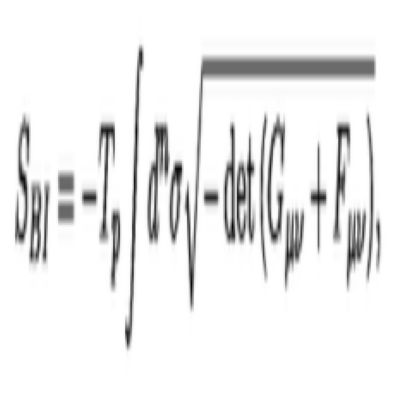

In [81]:
for x,y in data_dl:
    print(x.shape)
    print(y[0])
    show(x[0])
    break
    

In [116]:
class Tokenizer: 
    # Takes as an input the vocab of your text
    
    def __init__(self,vocab):
        self.vocab = vocab
        self.reverse_vocab = self._reverse_dict(self.vocab)
    def formula_to_tokens(self,formula):
        encoding=[]
        formula = formula.split()
        for ix in formula:
            encoding.append(self.vocab[f"{ix}"])
        return encoding
        
    def _reverse_dict(self,dict):
        return {v:k for k,v in dict.items()}
        
    def tokens_to_formula(self,tokens):        
        decoding = []
        for ix in tokens:
            decoding.append(self.reverse_vocab[ix])
        return decoding
    
    def get_string(self,encoded_string):
        string=''
        for i in encoded_string:
            string+=' ' + i
        string = string[1:]
        return string

In [115]:
string = y[5]
tokenizer = Tokenizer(vocab)
print(f"Stringul este :{string}")

encoded_string = tokenizer.formula_to_tokens(string)
print(f"Stringul encodata : {encoded_string}")

decoded_string = tokenizer.tokens_to_formula(encoded_string)
print(f"Stringul decodata este: {decoded_string}")

actual_string = tokenizer.get_string(decoded_string)
print(f"Strigul actual este :{actual_string}")

if actual_string == string:
    print("Asemanatoare")
else:
    print("AI gresit uratule")

Stringul este :P = q ^ { I } l _ { I } + n ^ { i } { \bar { k } } _ { i } + m _ { j } k ^ { j } \; \; i = 1 , \dots
, 6 \; \; \; I = 1 , \dots , 1 6

Stringul encodata : [55, 35, 484, 461, 495, 47, 497, 477, 462, 495, 47, 497, 7, 480, 461, 495, 473, 497, 495, 132, 
495, 476, 497, 497, 462, 495, 473, 497, 7, 478, 462, 495, 475, 497, 476, 461, 495, 475, 497, 78, 78, 473, 35, 20, 
8, 187, 8, 27, 78, 78, 78, 47, 35, 20, 8, 187, 8, 20, 27]

Stringul decodata este: ['P', '=', 'q', '^', '{', 'I', '}', 'l', '_', '{', 'I', '}', '+', 'n', '^', '{', 'i', '}', 
'{', '\\bar', '{', 'k', '}', '}', '_', '{', 'i', '}', '+', 'm', '_', '{', 'j', '}', 'k', '^', '{', 'j', '}', '\\;',
'\\;', 'i', '=', '1', ',', '\\dots', ',', '6', '\\;', '\\;', '\\;', 'I', '=', '1', ',', '\\dots', ',', '1', '6']

Strigul actual este :P = q ^ { I } l _ { I } + n ^ { i } { \bar { k } } _ { i } + m _ { j } k ^ { j } \; \; i = 1 ,
\dots , 6 \; \; \; I = 1 , \dots , 1 6

Asemanatoare

SA mi bag de mai stiu ce sa fac